# <center>Logistic Regression from Scratch</center>

#### Notations

n -> number of features  
m -> number of training examples  
X -> input data matrix (mxn)  
y -> target variable  
w -> weights (slopes)  
b -> bias (intercepts)  
y_hat -> predicted output / hypothesis  

NOTE: value of y... is either 0 or 1

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.metrics import accuracy_score

## Linear Data

In [86]:
X, y =make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

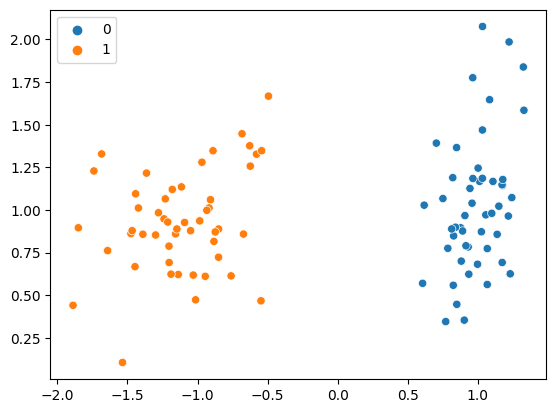

In [87]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

#### Sigmoid Function

In [88]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [89]:
# p(y=1|X;w,b) = y_hat
# p(y=0|X;w,b) = 1- y_hat

#### Binary Cross Entropy Loss

<img src='Binary Cross Entropy Loss.png' width=300>

In [90]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [91]:
def gradients(X, y, y_hat):
    m = X.shape[0]
    
    # gradient of loss wrto weights(slopes)
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # gradient of loss wrto bias(intercepts)
    db = (1/m)*np.sum((y_hat - y))
    
    return dw, db

In [92]:
# y_hat >= 0.5 : y=1
# y_hat < 0.5 : y=1

In [93]:
def plot_decision_boundary(X, w, b):
    
    # the line is y = mx + c
    # so, mx + c = wX + b
    
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    
    # graph
    fig = plt.figure(figsize=(10, 8))
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'go')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
    
#     plt.xlim([-2, 2])
#     plt.ylim([0, 2.2])
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.plot(x1, x2, 'r-')

In [94]:
def normalize(X):
    m, n = X.shape
    
    for i in range(n):
        X = (X - X.mean(axis=0)) / X.std(axis=0)
        
    return X

In [95]:
def train(X, y, bs, epochs, lr):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0
    y = y.reshape(m, 1)
    x = normalize(X)
    losses = []
    
    
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            dw, db = gradients(xb, yb, y_hat)
            
            w -= lr*dw
            b -= lr*db
            
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    return w, b, losses

In [96]:
def predict(X):
    x = normalize(X)
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i>0.5 else 0 for i in preds]
    
    return np.array(pred_class)

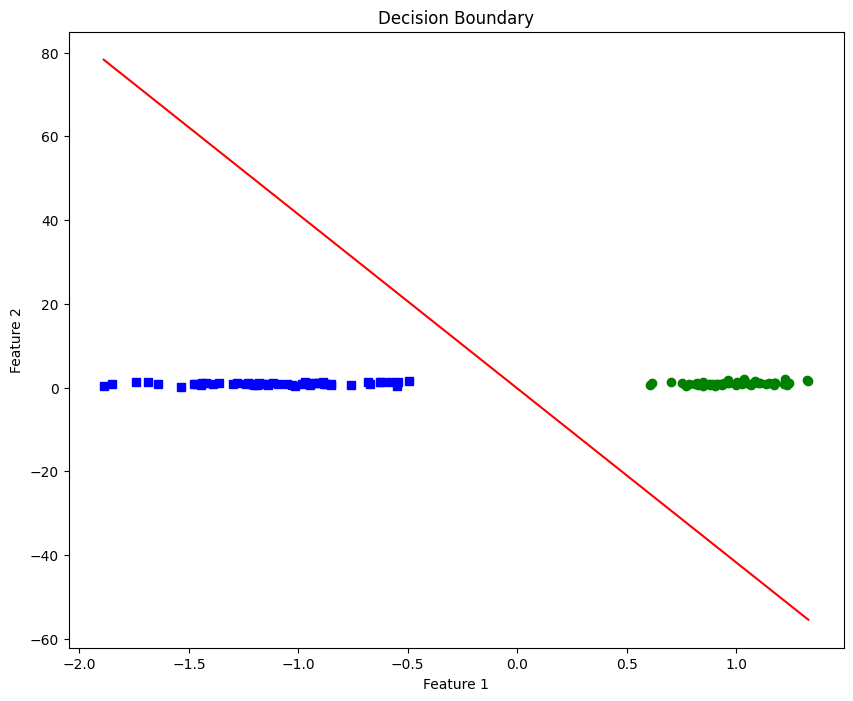

In [97]:
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)

plot_decision_boundary(X, w, b)

In [98]:
y_pred = predict(X)
accuracy_score(y, y_pred)

1.0

Our model is 100% accurate.

### Non-Linear Data

In [99]:
X, y = make_moons(n_samples=100, noise=0.24)

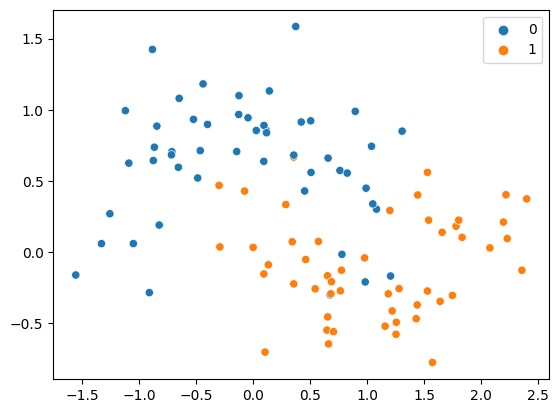

In [100]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

#### Training non-linear data

In [101]:
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)

#### Plotting decision boundary

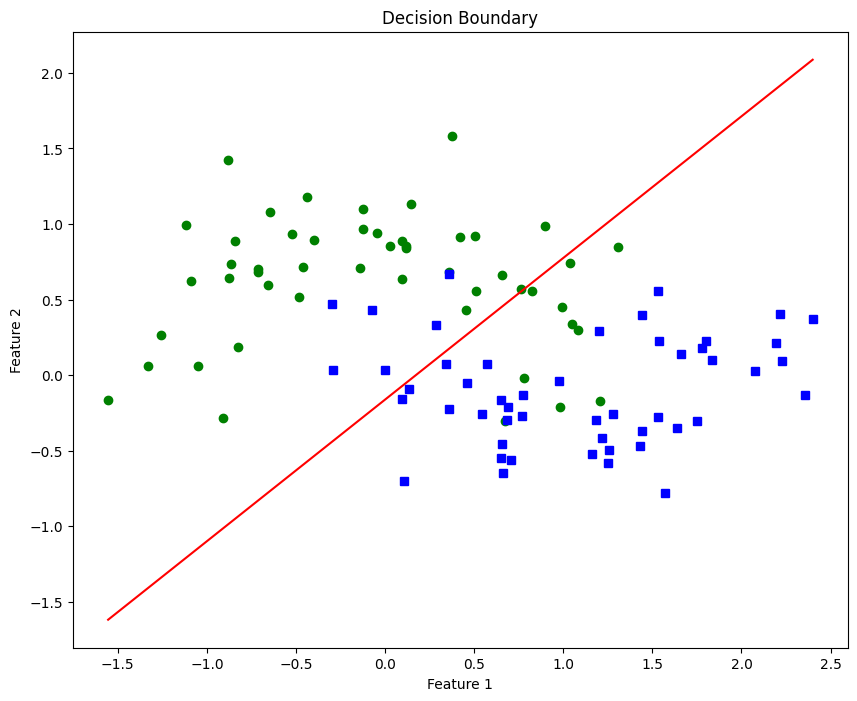

In [102]:
plot_decision_boundary(X, w, b)

In [103]:
y_pred = predict(X)
accuracy_score(y, y_pred)

0.84

Since not all the data points can be seperated into either 0 or 1, our model is only 84% accurate.